In [3]:
#各种所需要的库函数首先加载
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Part 1.iris深入认识

### 这是什么数据，加载后请分析？

In [4]:
iris=pd.read_csv('data/iris-data.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns.tolist()

['sepal_length_cm',
 'sepal_width_cm',
 'petal_length_cm',
 'petal_width_cm',
 'class']

In [7]:
iris.count()

sepal_length_cm    150
sepal_width_cm     150
petal_length_cm    150
petal_width_cm     145
class              150
dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [11]:
#又是class列名惹的祸
iris.rename(columns={'class':'species'},inplace=True)
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: species, dtype: int64

#### 初步探索：
#数据共有150行数据，每行5列；
#前4列为两个二元组，即花萼长宽、花瓣长宽；
#第五列为花的种类，由于列名不一致，所以列出了5中，但只有三种。
#空值数据为petal_width_cm，有5个空值
#类别名称不要用class，命名产生冲突

### 解决第一步遇到的问题
#1.解决类名不一致
#2.解决空值

#### 以上发现了类名有问题，即列名不一致。
#某列的名字需要改：data_df.rename(columns={'class':'Species'},inplace=True)
#某列中的类别需要改：data_df['Species'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'],inplace=True)

In [15]:
iris['species'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'],inplace=True)
iris['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

#### 解决空值问题，由于空值少，所以可以用均值填充，如果缺失值太多，那么可以剔除，但要保留数据到备份。
#### 特别注意，空值是属于哪一类的，不要拿所有类的均值填充！！！
#### pd.loc是用[], excuse me ?

In [33]:
#average=iris['petal_width_cm'].mean()#skipna : boolean, default True
#iris['petal_width_cm'].fillna(average)
iris.isnull().sum()
df_part=iris[iris['petal_width_cm'].isnull()==True]
df_part
#注意到空值的所有数据都是Iris-setosa的数据，所以用这个数据填充
average=iris.loc[iris['species']=='Iris-setosa','petal_width_cm' ].mean()
iris.loc[(iris['species']=='Iris-setosa') & (iris['petal_width_cm'].isnull()),'petal_width_cm']

7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: petal_width_cm, dtype: float64

In [35]:
iris.loc[(iris['species']=='Iris-setosa') & (iris['petal_width_cm'].isnull()),'petal_width_cm']=average
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

# Part 2.各种图表分析

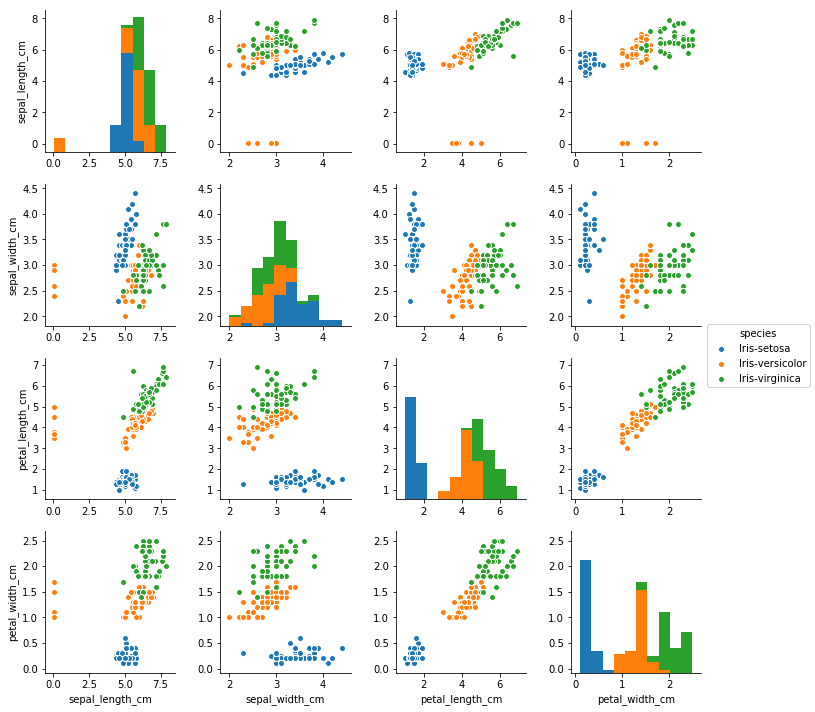

In [36]:
sb.pairplot(iris,hue='species')

#### seaborn的二元plot绘图很好用，两两组合，对角线是hist图表。
#### 以上观察第一列的黄点和第二列观察到蓝色是离群点。再用柱状图进一步分析：
#### 以下发现Iris-versicolor中的  sepal_length_cm有问题

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EE8DF7C18>,
      dtype=object)

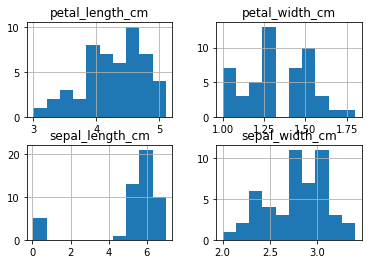

In [45]:
iris[iris['species']=='Iris-versicolor'].hist()

In [37]:
iris[iris['sepal_length_cm']<2.5]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [42]:
iris.loc[(iris['species']=='Iris-versicolor') & (iris['sepal_length_cm']>2.5), 'sepal_length_cm' ].mean()

5.942222222222223

In [43]:
iris.loc[(iris['species']=='Iris-versicolor') & (iris['sepal_length_cm']<2.5), 'sepal_length_cm' ].mean()

0.0588

#### 对比发现，两种数据相差100倍，所以根据业务场景分析，应该是单位cm与 m 导致的错误，所以纠正数据而不是drop数据。
#### 此处用到了 *=  的精髓， 将原来的数据扩大或缩小倍数

In [46]:
iris.loc[(iris['species']=='Iris-versicolor') & (iris['sepal_length_cm']<2.5), 'sepal_length_cm' ] *=100

#### 接下来观察蓝色离群点，即Iris-setosa，绘制以下图表后发现：
#### 其sepal_width_cm异常

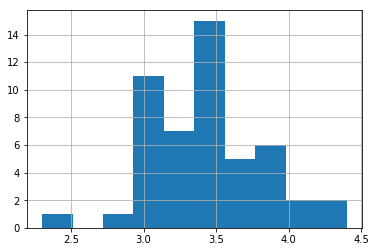

In [50]:
iris.loc[iris['species']=='Iris-setosa','sepal_width_cm'].hist()

In [53]:
iris.loc[(iris['species']=='Iris-setosa') & (iris['sepal_width_cm']<2.5)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
41,4.5,2.3,1.3,0.3,Iris-setosa


In [56]:
iris.loc[(iris['species']=='Iris-setosa') & (iris['sepal_width_cm']>2.5),'sepal_width_cm'].describe()

count    49.000000
mean      3.440816
std       0.348759
min       2.900000
25%       3.200000
50%       3.400000
75%       3.700000
max       4.400000
Name: sepal_width_cm, dtype: float64

In [59]:
(2.9-2.3)/2.3
(3.44-2.3)/3.44

0.33139534883720934

#就该异常点来看：（2.9-2.3）%2.3=0.26086956521739135，
#它本身就离群中心较远，而且比离他最近的都小了较大的一部分。由于没有具体场景分析调整，所以drop掉

''

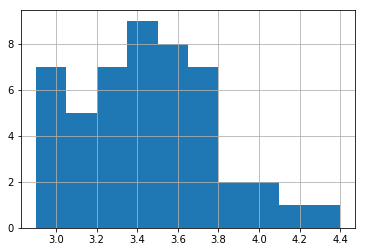

In [61]:
iris = iris.loc[(iris['species'] != 'Iris-setosa') | (iris['sepal_width_cm'] >= 2.5)]
iris.loc[iris['species'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

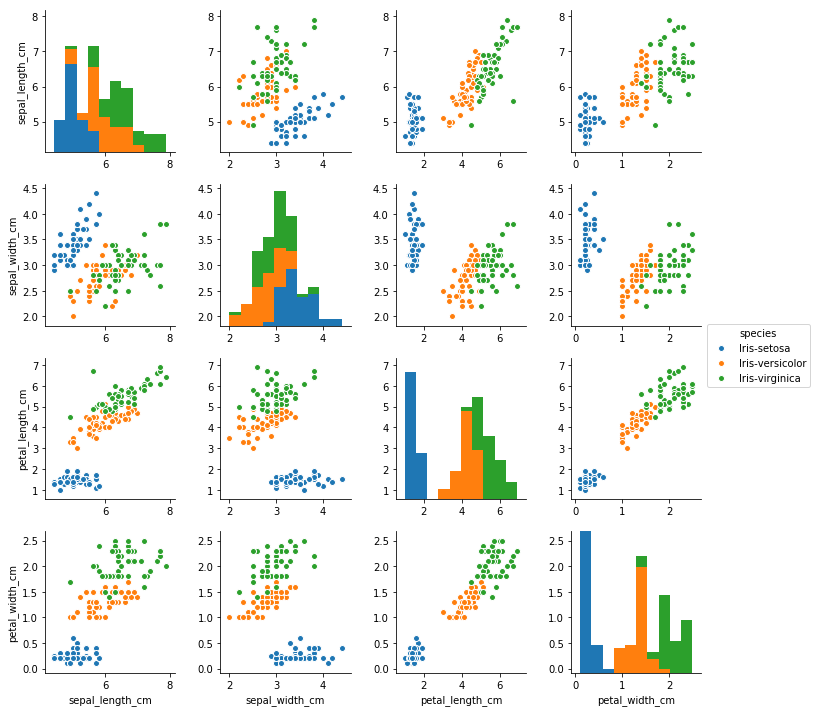

In [62]:
sb.pairplot(iris,hue='species')

#### 清洗完数据后就可以保存干净的数据到新的csv文件中了。

In [64]:
iris.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')

## Testing our data

In [67]:
# We know that we should only have three classes
assert len(iris_data_clean['species'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['species'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

''

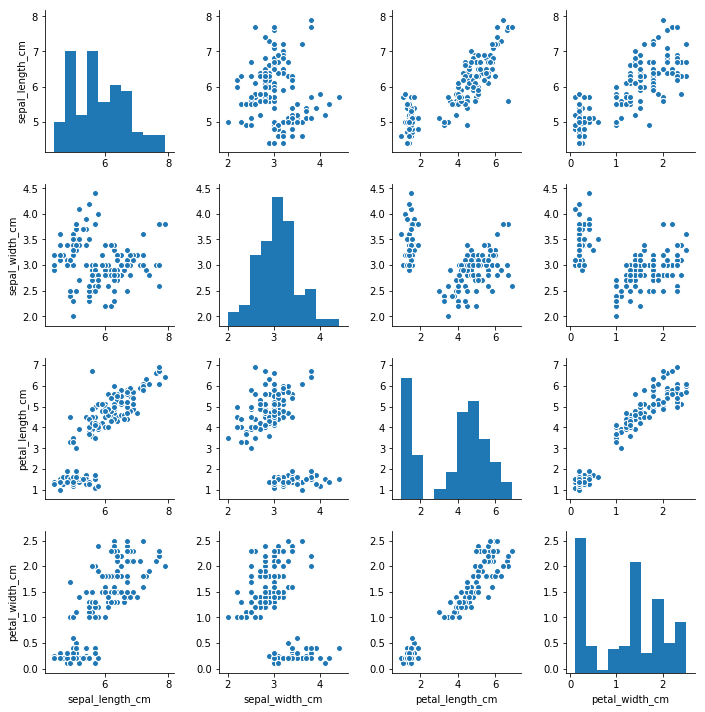

In [68]:
sb.pairplot(iris_data_clean)#没有 hue参数，所以全都是一类，都是同一颜色
;

''

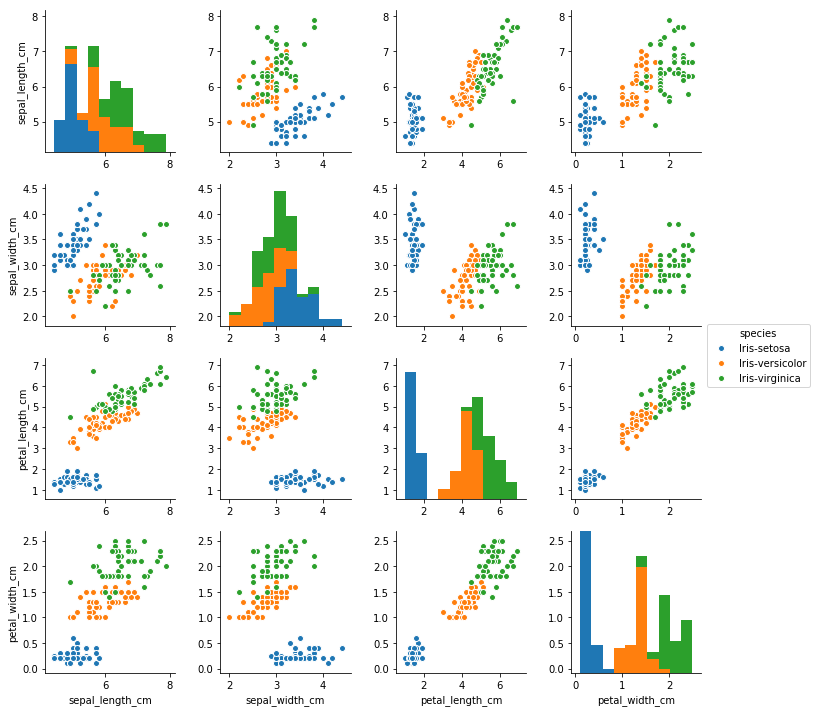

In [71]:
sb.pairplot(iris_data_clean,hue='species')
;

花瓣的尺寸可以很容易地区分Iris-setosa和其他类型的鸢尾。鉴于Iris-versicolor和鸢尾-virginica的测量值有多少重叠，区分它们将变得更加困难。 花瓣长度和花瓣宽度，以及萼片长度和萼片宽度之间也存在相关性。 田野生物学家向我们保证，这是可以预料的:花瓣越长，往往越宽，萼片也一样。 我们也可以把数据绘制成小提琴图来比较各个班级的测量分布。

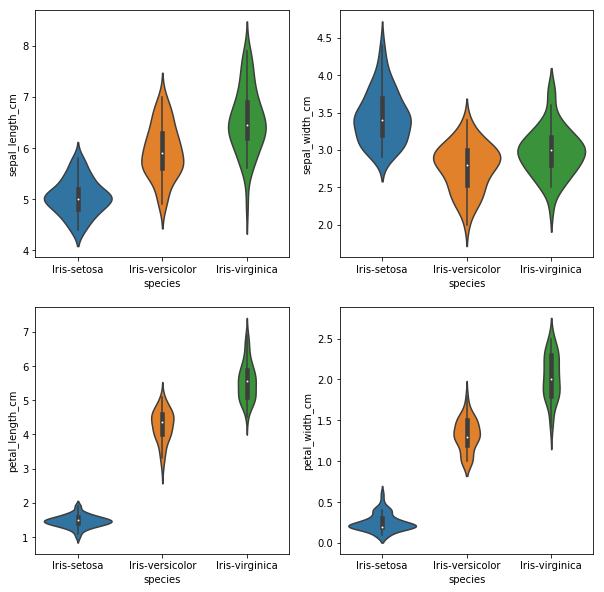

In [75]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    
    if column == 'species':
        continue
        
    #print('column_index=',column_index) column_index是0序
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='species', y=column, data=iris_data_clean)